# Pandas

- 데이터 처리와 분석을 위한 라이브러리
- 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있음
- 대용량의 데이터들을 처리하는데 매우 편리
- pandas 자료구조
    * Series: 1차원
    * DataFrame: 2차원
    * Panel: 3차원
- pandas 로딩

In [1]:
import numpy as np # 보통 numpy와 함께 import
import pandas as pd

### 2.1 Pandas DataFrame

- 2차원 자료구조
- 행레이블/열레이블, 데이터로 구성됨
- 딕셔너리(dictionary)에서 데이터프레임 생성

In [2]:
import pandas as pd
# 딕셔너리
data = {
    'year':[2016, 2017, 2018],
    'GDP rate': [2.8, 3.1, 3.0],
    'GDP': ['1.637M', '1.73M', '1.83M']
}
df = pd.DataFrame(data=data, index=data['year']) # index 추가할 수 있음
print(df)

      year  GDP rate     GDP
2016  2016       2.8  1.637M
2017  2017       3.1   1.73M
2018  2018       3.0   1.83M


In [3]:
print("row labels:", df.index)

row labels: Index([2016, 2017, 2018], dtype='int64')


In [4]:
print("column labels:", df.columns)

column labels: Index(['year', 'GDP rate', 'GDP'], dtype='object')


In [5]:
print("head:",df.head()) # print some lines in data

head:       year  GDP rate     GDP
2016  2016       2.8  1.637M
2017  2017       3.1   1.73M
2018  2018       3.0   1.83M


- csv 파일에서 데이터프레임 생성

In [6]:
csv_data_df = pd.read_csv('C:/Users/pps/Desktop/배정환(인턴)/titanic.csv')
print(csv_data_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
print(csv_data_df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


- 특정 변수의 추출

In [8]:
# df에서 year변수의 값 추출
print(df['year'])
# 또는

2016    2016
2017    2017
2018    2018
Name: year, dtype: int64


In [9]:
print(df.year)

2016    2016
2017    2017
2018    2018
Name: year, dtype: int64


- 부분추출

In [10]:
print(csv_data_df[['survived', 'age']]) # DataFrame

     survived   age
0           0  22.0
1           1  38.0
2           1  26.0
3           1  35.0
4           0  35.0
..        ...   ...
886         0  27.0
887         1  19.0
888         0   NaN
889         1  26.0
890         0  32.0

[891 rows x 2 columns]


In [11]:
print(csv_data_df.loc[:3,['survived','age']])

   survived   age
0         0  22.0
1         1  38.0
2         1  26.0
3         1  35.0


In [12]:
print(csv_data_df.iloc[:3, :3])

   survived  pclass     sex
0         0       3    male
1         1       1  female
2         1       3  female


In [13]:
print(csv_data_df[csv_data_df['sex'] == 'male']) # Bool 인덱싱

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
0           0       3  male  22.0      1      0   7.2500        S   Third   
4           0       3  male  35.0      0      0   8.0500        S   Third   
5           0       3  male   NaN      0      0   8.4583        Q   Third   
6           0       1  male  54.0      0      0  51.8625        S   First   
7           0       3  male   2.0      3      1  21.0750        S   Third   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
883         0       2  male  28.0      0      0  10.5000        S  Second   
884         0       3  male  25.0      0      0   7.0500        S   Third   
886         0       2  male  27.0      0      0  13.0000        S  Second   
889         1       1  male  26.0      0      0  30.0000        C   First   
890         0       3  male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        T

#### Indexing options with DataFrame

#### Type

- df[val]                     : Select single column or sequence of columns from the DataFrame (단일 열/ 열의 시퀀스 선택)
- df.loc[val]                 : Selects single row or subset of rows from the DataFrame by label (라벨을 이용해서 단일 행 / 행의 부분 집합을 선택)
- df.loc[:, val]              : Selects single column or subset of columns by label (라벨을 사용하여 단일 열 / 열의 부분 집합을 선택)
- df.loc[val1, val2]          : Select both rows and columns by label (라벨을 사용하여 행과 열을 동시에 선택)
- df.iloc[where]              : Selects single row or subset of rows from the DataFrame by integer position (정수 위치를 사용하여 단일 행 / 행의 부분 집합을 선택)
- df.iloc[:,where]            : Selects single column or subset of columns by integer position (정수 위치를 사용하여 단일 열 / 열의 부분 집합을 선택)
- df.iloc[where_i, where_j]   : Select both rows and columns by integer position (정수 위치를 사용하여 행과 열을 동시에 선택)
- df.at[label_i, label_j]     : Select a single scalar value by row and column label (행과 열 라벨을 사용하여 단일 스칼라 값을 선택)
- df.iat[i, j]                : Select a single scalar value by row and column position (integers) (행과 열의 정수 위치를 사용하여 단일 스칼라 값을 선택)
- get_value(),set_value()     : Select single value by row and column label (헹과 열 라벨을 사용하여 단일 값을 선택 / 설정 -> at(라벨) 과 iat(정수 위치)로 대체됨)

- 요약

In [14]:
print(csv_data_df['pclass'].sum())

2057


In [15]:
print(df.describe()) # describe()를 통해 기본적인 통계치를 모두 표시

         year  GDP rate
count     3.0  3.000000
mean   2017.0  2.966667
std       1.0  0.152753
min    2016.0  2.800000
25%    2016.5  2.900000
50%    2017.0  3.000000
75%    2017.5  3.050000
max    2018.0  3.100000


In [16]:
print(csv_data_df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


- 빈도

In [17]:
# One-way contingency table
x= pd.crosstab(index=csv_data_df.sex, columns="pclass", margins=True)
print(x)

col_0   pclass  All
sex                
female     314  314
male       577  577
All        891  891


In [18]:
print('type of x=', type(x))

type of x= <class 'pandas.core.frame.DataFrame'>


In [19]:
print(x['pclass'])

sex
female    314
male      577
All       891
Name: pclass, dtype: int64


In [20]:
# Two-way contingency table
pd.crosstab(csv_data_df.sex, csv_data_df.who, margins=True)

who,child,man,woman,All
sex,,,,
female,43,0,271,314
male,40,537,0,577
All,83,537,271,891


In [21]:
# Three-way contingency table
pd.crosstab([csv_data_df.sex, csv_data_df.who], csv_data_df.alive, margins=True)

alive          no  yes  All
sex    who                 
female child   15   28   43
       woman   66  205  271
male   child   19   21   40
       man    449   88  537
All           549  342  891

### 2.2 Pandas 통계처리

- df.sum()
- df.sum(axis='columns')
- df.mean(axis='columns', skipna=False)
- df.cumsum()

#### Method

- count             : Number of non-NA values
- describe          : Compute set of summary statistics for Series or each DataFrame column (기본적인 통계 세부 정보를 보는데 사용)
- min, max          : Compute minimum and maximum values
- argmin, argmax    : Compute index locations (integers) at which minimum or maximum value obtained, respectively 
- idxmin, idxmax    : Compute index labels at which minimum or maximum value obtained, respectively
- quantile          : Compute sample quantile ranging from 0 to 1 (분위수 - 확률 분포의 범위를 동일한 확률의 연속 간격으로 나누거나 동일한 방식으로 표본의 관측치를 나누는 절단점)
- sum               : Sum of values
- mean              : Mean of values
- median            : median (50% qunatile) of values
- mad               : Mean absolute deviation from mean value (평균 절대 편차 - 각 측정값과 평균 사이의 거리의 평균)
- prod              : Product of all values
- var               : Sample variance of values
- std               : Sample standard deviation of values
- skew              : Sample skewness (third moment) of values (비대칭도)
- kurt              : Sample kurtosis (fourth moment) of values (첨도 - 데이터의 확률 분포가 얼마나 뾰족한지를 나타냄)
- cumsum            : Cumulative sum of values (누적합)
- cummin, cummax    : Cumulative minimum or maximum of values, respectively
- cumprod           : Cumulative product of values
- diff              : Compute first arithmetic difference (useful for time series) (차이 - 한 객체 내에서 열과 열/행과 행의 차이를 출력하는 메서드)
- pct_change        : Compute percent changes (백분율)

### 2.3 Pandas plot

1. Boxplot

In [22]:
df = pd.DataFrame({
    'unif': np.random.uniform(-3, 3, 20),
    'norm': np.random.normal(0, 1, 20)
})

print(df.head())

       unif      norm
0  2.119471  0.701998
1  1.472045  0.008420
2 -0.372485 -0.593326
3  1.496542  0.632886
4  2.010185  0.545828


<Axes: >

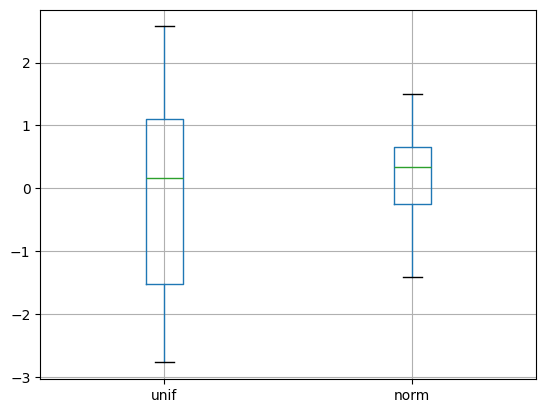

In [23]:
df.boxplot(column=['unif', 'norm'])

In [24]:
import matplotlib.pyplot as plt

2. time series plot

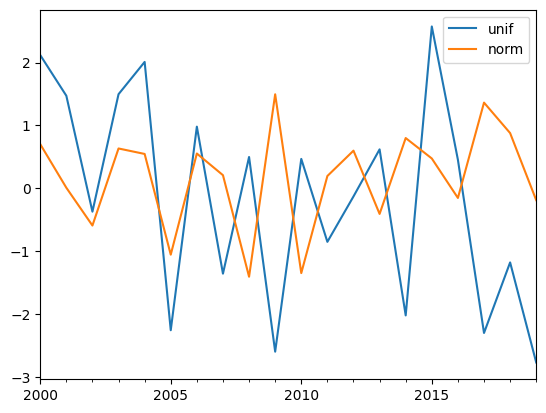

In [25]:
df.index = pd.date_range('2000', freq='YE', periods=df.shape[0])
df.plot()
plt.show()

3. scatter plot

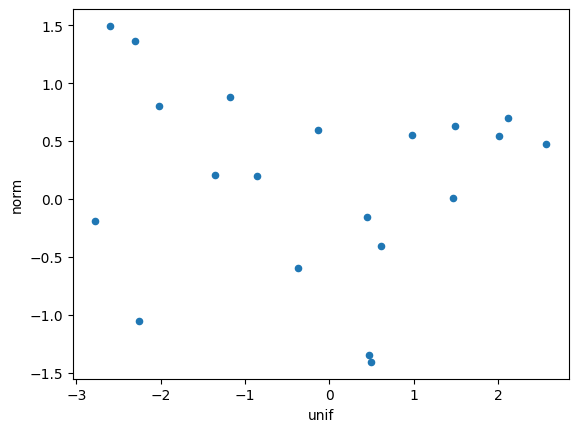

In [26]:
df.plot.scatter(x='unif', y = 'norm')
plt.show()

### 2.4 Read & write data in Pandas

#### Functions

- read_csv              : Load delimited data from a file, URL, or file-like object, use comma as default delimiter
- read_table            : Load delimited data from a file, URL, or file-like object, use tab (') as default delimiter
- read_fwf              : Read data in fixed_width column format (i.e., no delimiters) (구분자가 없는 데이터를 읽음)
- read_excel            : Read tabular data from an Excel XLS or XLSX file
- read_html             : Read all tables found in the given HTML document
- read_json             : Read data from a JSON (JavaScript Object Notation) string representation

In [27]:
df = pd.read_csv('C:/Users/pps/Desktop/배정환(인턴)/finance.csv', encoding= 'euc-kr')
print(df)

    나이  학력수준            소득
0   54    14  66814.194580
1   40    12  42144.338120
2   35    14  25697.767150
3   55    12  35976.874000
4   40    12  39060.606060
..  ..   ...           ...
95  25    14   4625.598086
96  50    17  50367.623600
97  67    14  66814.194580
98  30    14  52423.444980
99  28    12  37004.784690

[100 rows x 3 columns]
